In [ ]:
!pip install tensorflow-gpu

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
# Folders for Model and Training History
os.makedirs("drive/My Drive/Models",exist_ok=True)
os.makedirs("drive/My Drive/Logs",exist_ok=True)

path_to_model="drive/My Drive/Models"
path_to_logs = "drive/My Drive/Logs"

# Task List
* No CNN for MNIST and CIFAR10

* CNN model and comapare it with FFNN mode

* Develop : Web based 

* Random unseen input

* Demonstrate

* Observations 

* What configuration of Neuron

* Update configuration and change in accuracy if any

# MNIST DNN

### Libraries

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random 
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report ,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Get  Data

In [ ]:
mnist_data = tf.keras.datasets.mnist
(train_images,train_labels),(test_images,test_labels) = mnist_data.load_data()
print("Shape training set "+str(train_images.shape))
print("Shape Test set "+str(test_images.shape))
print("No of training exapmles "+str(train_images.shape[0]))
print("No of Test exapmles "+str(test_images.shape[0]))
print("Shape of Each Image "+str(train_images[0].shape))

11493376/11490434 [==============================] - 0s 0us/step
Shape training set (60000, 28, 28)
Shape Test set (10000, 28, 28)
No of training exapmles 60000
No of Test exapmles 10000
Shape of Each Image (28, 28)


### Visualize Data

This is image of Number 0


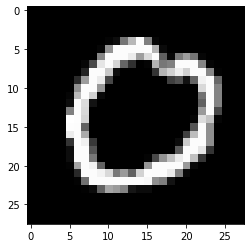

In [ ]:

def disp():
    id = random.randint(0,train_images.shape[0])
    img = train_images[id]
    l = train_labels[id]
    plt.imshow(img,cmap='gray')
    print("This is image of Number "+str(l))
    plt.show()
disp()

### Normalize the data

In [ ]:
train_images = train_images/255
test_images = test_images/255
print("Range of image 0-1")

Range of image 0-1


### Set Constants


In [ ]:
model_name = 'mnist_dnn_'
input_shape = (28,28)
activation_h = tf.keras.activations.relu
activation_o = tf.keras.activations.softmax
optimizer = tf.keras.optimizers.Adam()
loss = tf.keras.losses.SparseCategoricalCrossentropy()
epochs =100

### Model Construction

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=input_shape))
model.add(tf.keras.layers.Dense(128,activation=activation_h))
model.add(tf.keras.layers.Dense(10,activation=activation_o))
model.summary()

model.compile(optimizer=optimizer,loss=loss,metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Training and Callback setup

In [ ]:
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath=f"{path_to_model}/{model_name}.h5", monitor = 'val_accuracy',verbose=1, save_best_only=True)
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=6)
logs = tf.keras.callbacks.CSVLogger(filename=f"{path_to_logs}/{model_name}.csv")
h=model.fit(train_images,train_labels,batch_size=128,validation_data=(test_images,test_labels),epochs=epochs,callbacks=[checkpointer,es,logs])

Epoch 1/100
448/469 [===========================>..] - ETA: 0s - loss: 0.3686 - accuracy: 0.8982
Epoch 00001: val_accuracy improved from -inf to 0.94600, saving model to drive/My Drive/Models/mnist_dnn_128_scc_adam.h5
469/469 [==============================] - 1s 3ms/step - loss: 0.3614 - accuracy: 0.9002 - val_loss: 0.1886 - val_accuracy: 0.9460
Epoch 2/100
452/469 [===========================>..] - ETA: 0s - loss: 0.1667 - accuracy: 0.9525
Epoch 00002: val_accuracy improved from 0.94600 to 0.95800, saving model to drive/My Drive/Models/mnist_dnn_128_scc_adam.h5
469/469 [==============================] - 1s 3ms/step - loss: 0.1663 - accuracy: 0.9527 - val_loss: 0.1382 - val_accuracy: 0.9580
Epoch 3/100
458/469 [============================>.] - ETA: 0s - loss: 0.1207 - accuracy: 0.9649
Epoch 00003: val_accuracy improved from 0.95800 to 0.96700, saving model to drive/My Drive/Models/mnist_dnn_128_scc_adam.h5
469/469 [==============================] - 1s 3ms/step - loss: 0.1202 - accura

### Evaluation

 ### a. Training Plots

Text(0.5, 1.0, 'accuracy')

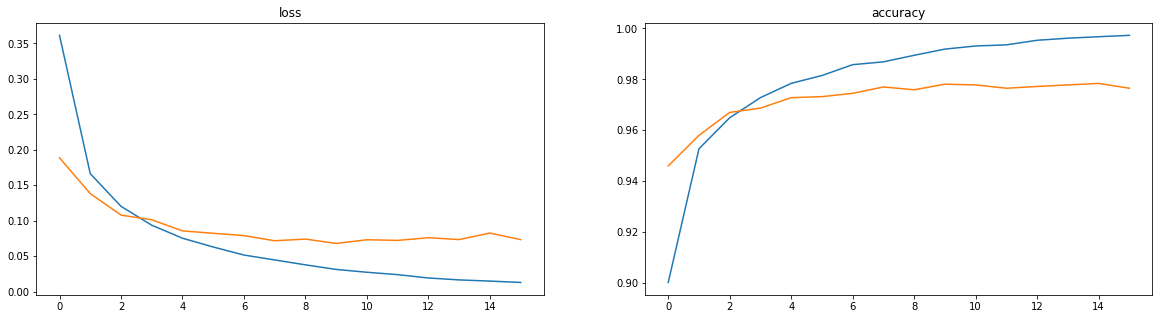

In [ ]:

fig, axs = plt.subplots(1, 2,figsize=(20,5))

axs[0].plot(h.history['loss'])
axs[0].plot(h.history['val_loss'])
axs[0].set_title('loss')

axs[1].plot(h.history['accuracy'])
axs[1].plot(h.history['val_accuracy'])
axs[1].set_title('accuracy')



### b.Accuracy and loss

In [ ]:
#Load model with best weights
model = tf.keras.models.load_model(f"{path_to_model}/{model_name}.h5")

In [ ]:
loss, accuracy  = model.evaluate(test_images, test_labels,verbose=0)
print(f"Validation accuracy :{round(accuracy*1000,4)} %")
print(f"Validation Loss :{loss}")

Validation accuracy :99.05
Validation Loss :0.08250269293785095


In [ ]:
loss, accuracy  = model.evaluate(train_images, train_labels,verbose=0)
print(f"Training Accuracy :{round(accuracy*1000,4)} %")
print(f"Training Validation Loss :{loss}")

Training Accuracy :98.7167 %
Training Validation Loss :0.014962858520448208


### c. Classification Report

In [ ]:
import numpy as np
p=model.predict(test_images)
p = [np.argmax(x) for x in p]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_labels,p))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.98      0.97      0.98      1010
           4       0.97      0.99      0.98       982
           5       0.98      0.97      0.98       892
           6       0.99      0.97      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.99      0.95      0.97       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



### d. Confusion Matrix

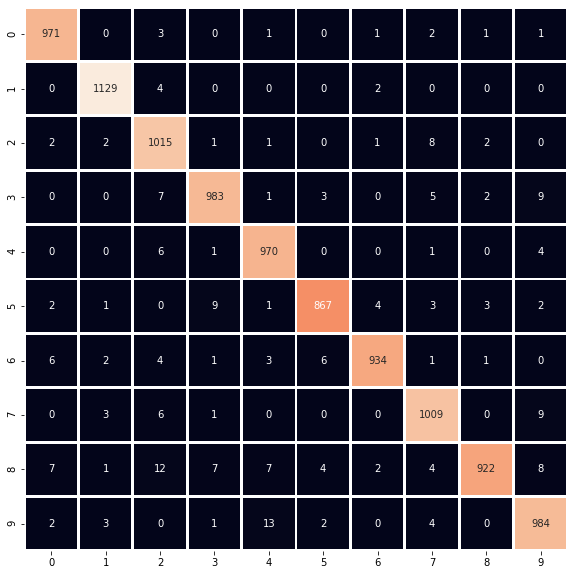

In [ ]:
import seaborn as sns
labels = ['0','1','2','3','4','5','6','7','8','9']
cm=confusion_matrix(test_labels,p)
plt.figure(figsize=(10,10))
sns.heatmap(cm,square=True,cbar=False,xticklabels=labels,yticklabels=labels,annot=True,fmt="d",linewidths=2)

# DNN Cifar

### Load and Visualize Data

In [ ]:
cifar_data = tf.keras.datasets.cifar10
(train_images,train_labels),(test_images,test_labels) = cifar_data.load_data()
print("Shape of training set "+str(train_images.shape))
print("Shape of Test set "+str(test_images.shape))
print("No of training exapmles "+str(train_images.shape[0]))
print("No of Test exapmles "+str(test_images.shape[0]))
print("Shape of Each Image "+str(train_images[0].shape))

170500096/170498071 [==============================] - 3s 0us/step
Shape of training set (50000, 32, 32, 3)
Shape of Test set (10000, 32, 32, 3)
No of training exapmles 50000
No of Test exapmles 10000
Shape of Each Image (32, 32, 3)


This is image of Number [3]


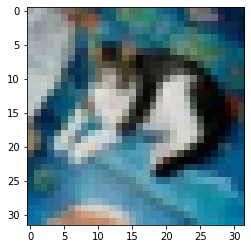

In [ ]:
def disp():
    id = random.randint(0,train_images.shape[0])
    img = train_images[id]
    l = train_labels[id]
    plt.imshow(img)
    print("This is image of Number "+str(l))
    plt.show()
disp()

### Normalize Data

In [ ]:
train_images = train_images/255
test_images = test_images/255
print("Range of image 0-1")

Range of image 0-1


### Set Constants


In [ ]:
model_name = 'cifar_dnn'

input_shape = (32,32)
activation_h= tf.keras.activations.relu
activation_o = tf.keras.activations.softmax
optimizer = tf.keras.optimizers.Adam()
loss = tf.keras.losses.SparseCategoricalCrossentropy()
epochs =100

### Model Creation

In [ ]:
inp_shape=(32,32,3)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=inp_shape))
model.add(tf.keras.layers.Dense(512,activation=activation_h))
model.add(tf.keras.layers.Dense(256,activation=activation_h))
model.add(tf.keras.layers.Dense(128,activation=activation_h))
model.add(tf.keras.layers.Dense(10,activation=activation_o))
model.summary()


model.compile(optimizer=optimizer,loss=loss,metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


## Training and callbacks

In [ ]:
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath=f"{path_to_model}/{model_name}.hdf5", 
                               monitor = 'val_accuracy',
                               verbose=1, 
                               save_best_only=True,)

es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=15)

logs = tf.keras.callbacks.CSVLogger(filename=f"{path_to_logs}/{model_name}.csv")
h = model.fit(train_images,train_labels,batch_size=128,validation_data=(test_images,test_labels),epochs=epochs,callbacks=[checkpointer,es,logs])

Epoch 1/100
380/391 [============================>.] - ETA: 0s - loss: 1.9052 - accuracy: 0.3118
Epoch 00001: val_accuracy improved from -inf to 0.39500, saving model to drive/My Drive/Models/cifar_dnn_128_scc_adam.hdf5
391/391 [==============================] - 2s 4ms/step - loss: 1.9011 - accuracy: 0.3138 - val_loss: 1.7116 - val_accuracy: 0.3950
Epoch 2/100
381/391 [============================>.] - ETA: 0s - loss: 1.6936 - accuracy: 0.3911
Epoch 00002: val_accuracy improved from 0.39500 to 0.40720, saving model to drive/My Drive/Models/cifar_dnn_128_scc_adam.hdf5
391/391 [==============================] - 1s 4ms/step - loss: 1.6918 - accuracy: 0.3917 - val_loss: 1.6585 - val_accuracy: 0.4072
Epoch 3/100
391/391 [==============================] - ETA: 0s - loss: 1.5975 - accuracy: 0.4295
Epoch 00003: val_accuracy improved from 0.40720 to 0.44040, saving model to drive/My Drive/Models/cifar_dnn_128_scc_adam.hdf5
391/391 [==============================] - 1s 4ms/step - loss: 1.5975 - 

## Evaluation
### a.Training Graph

Text(0.5, 1.0, 'accuracy')

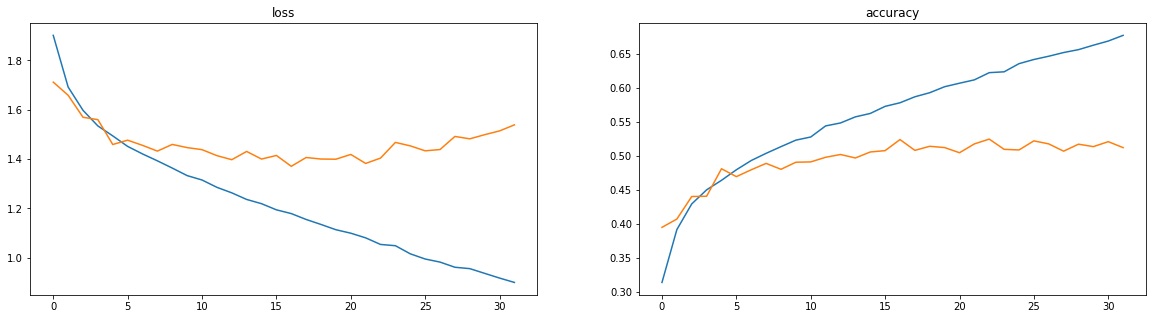

In [ ]:

fig, axs = plt.subplots(1, 2,figsize=(20,5))

axs[0].plot(h.history['loss'])
axs[0].plot(h.history['val_loss'])
axs[0].set_title('loss')

axs[1].plot(h.history['accuracy'])
axs[1].plot(h.history['val_accuracy'])
axs[1].set_title('accuracy')



### b.Accuracy and loss

In [ ]:
#Load model with best weights
model = tf.keras.models.load_model(f"{path_to_model}/{model_name}.h5")

In [ ]:
loss, accuracy  = model.evaluate(test_images, test_labels,verbose=0)
print(f"Validation accuracy :{round(accuracy*100,4)} %")
print(f"Validation Loss :{loss}")

Validation accuracy :10.65 %
Validation Loss :1.4040132761001587


In [ ]:
loss, accuracy  = model.evaluate(train_images, train_labels,verbose=0)
print(f"Training Accuracy :{round(accuracy*100,4)} %")
print(f"Training Validation Loss :{loss}")

Training Accuracy :10.596 %
Training Validation Loss :0.9919702410697937


### c. Classification Report

In [ ]:
import numpy as np
p=model.predict(test_images)
p = [np.argmax(x) for x in p]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_labels,p))

              precision    recall  f1-score   support

           0       0.57      0.60      0.58      1000
           1       0.64      0.65      0.65      1000
           2       0.41      0.39      0.40      1000
           3       0.37      0.31      0.34      1000
           4       0.53      0.35      0.42      1000
           5       0.45      0.41      0.43      1000
           6       0.49      0.66      0.56      1000
           7       0.64      0.54      0.59      1000
           8       0.62      0.69      0.65      1000
           9       0.51      0.65      0.57      1000

    accuracy                           0.53     10000
   macro avg       0.52      0.53      0.52     10000
weighted avg       0.52      0.53      0.52     10000



### d. Confusion Matrix

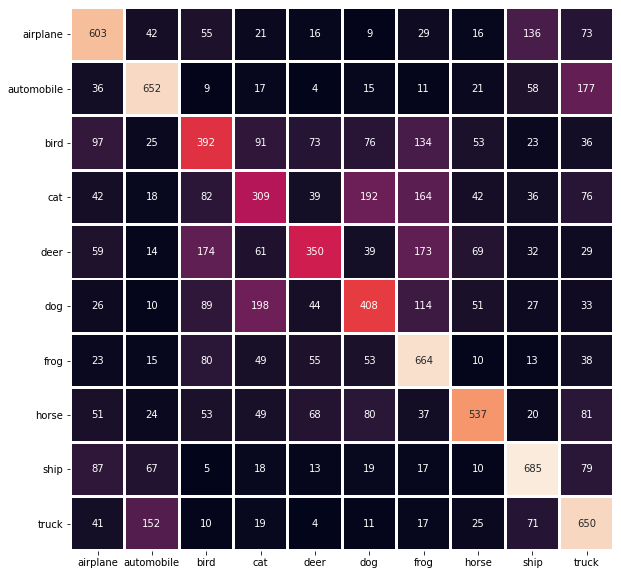

In [ ]:
import seaborn as sns
labels =  ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
cm=confusion_matrix(test_labels,p)
plt.figure(figsize=(10,10))
sns.heatmap(cm,square=True,cbar=False,xticklabels=labels,yticklabels=labels,annot=True,fmt="d",linewidths=2)

# CNN Cifar

## Set Constants

In [ ]:
model_name = 'cifar_cnn'

input_shape = (32,32,3)
activation_h= tf.keras.activations.relu
activation_o = tf.keras.activations.softmax
optimizer = tf.keras.optimizers.Adam()
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
epochs =100

## Model Creation

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation=activation_h, input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation=activation_h))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation=activation_h))
model.add(tf.keras.layers.Dense(10,activation=activation_o))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               295168    
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

## Training

In [ ]:
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath=f"{path_to_model}/{model_name}.h5", 
                               monitor = 'val_accuracy',
                               verbose=1, 
                               save_best_only=True,)

es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=15)

logs = tf.keras.callbacks.CSVLogger(filename=f"{path_to_logs}/{model_name}.csv")

In [ ]:
model.compile(optimizer=optimizer,loss=loss,metrics=['accuracy'])

h = model.fit(train_images, train_labels, epochs=epochs, 
                    validation_data=(test_images, test_labels),callbacks=[checkpointer,es,logs])

Epoch 1/100
1556/1563 [============================>.] - ETA: 0s - loss: 2.0865 - accuracy: 0.3659
Epoch 00001: val_accuracy improved from -inf to 0.44060, saving model to drive/My Drive/Models/cifar_cnn_32_64_64_scc_adam.h5
1563/1563 [==============================] - 5s 3ms/step - loss: 2.0863 - accuracy: 0.3661 - val_loss: 2.0138 - val_accuracy: 0.4406
Epoch 2/100
1548/1563 [============================>.] - ETA: 0s - loss: 1.9992 - accuracy: 0.4590
Epoch 00002: val_accuracy improved from 0.44060 to 0.48200, saving model to drive/My Drive/Models/cifar_cnn_32_64_64_scc_adam.h5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.9989 - accuracy: 0.4594 - val_loss: 1.9749 - val_accuracy: 0.4820
Epoch 3/100
1557/1563 [============================>.] - ETA: 0s - loss: 1.9695 - accuracy: 0.4893
Epoch 00003: val_accuracy improved from 0.48200 to 0.51020, saving model to drive/My Drive/Models/cifar_cnn_32_64_64_scc_adam.h5
1563/1563 [==============================] - 5s 3ms/s

## Evaluation
### a.Training Graph

Text(0.5, 1.0, 'accuracy')

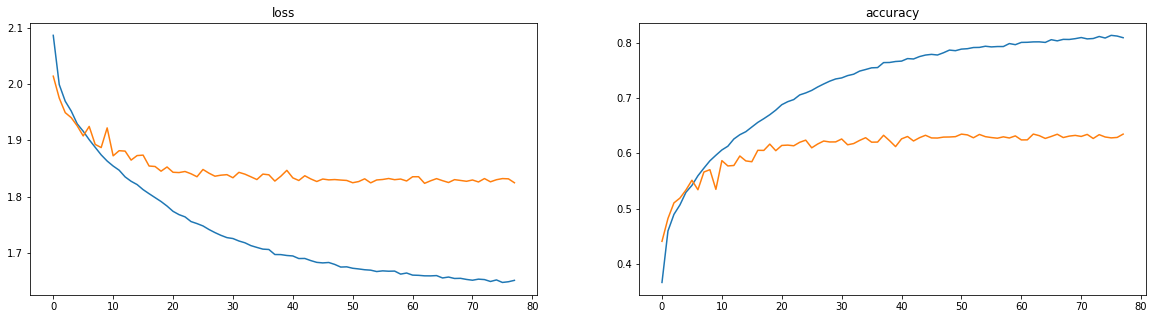

In [ ]:

fig, axs = plt.subplots(1, 2,figsize=(20,5))

axs[0].plot(h.history['loss'])
axs[0].plot(h.history['val_loss'])
axs[0].set_title('loss')

axs[1].plot(h.history['accuracy'])
axs[1].plot(h.history['val_accuracy'])
axs[1].set_title('accuracy')



### b.Accuracy and loss

In [ ]:
#Load model with best weights
model = tf.keras.models.load_model(f"{path_to_model}/{model_name}.h5")

In [ ]:
loss, accuracy  = model.evaluate(test_images, test_labels,verbose=0)
print(f"Validation accuracy :{round(accuracy*1000,4)} %")
print(f"Validation Loss :{loss}")

Validation accuracy :91.5 %
Validation Loss :1.8235313892364502


In [ ]:
loss, accuracy  = model.evaluate(train_images, train_labels,verbose=0)
print(f"Training Accuracy :{round(accuracy*1000,4)} %")
print(f"Training Validation Loss :{loss}")

Training Accuracy :95.26 %
Training Validation Loss :1.64875328540802


### c. Classification Report

In [ ]:
import numpy as np
p=model.predict(test_images)
p = [np.argmax(x) for x in p]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_labels,p))

              precision    recall  f1-score   support

           0       0.72      0.66      0.69      1000
           1       0.77      0.72      0.74      1000
           2       0.55      0.48      0.51      1000
           3       0.43      0.53      0.47      1000
           4       0.56      0.58      0.57      1000
           5       0.55      0.50      0.52      1000
           6       0.67      0.74      0.70      1000
           7       0.71      0.65      0.68      1000
           8       0.78      0.74      0.76      1000
           9       0.66      0.75      0.70      1000

    accuracy                           0.63     10000
   macro avg       0.64      0.63      0.64     10000
weighted avg       0.64      0.63      0.64     10000



### d. Confusion Matrix

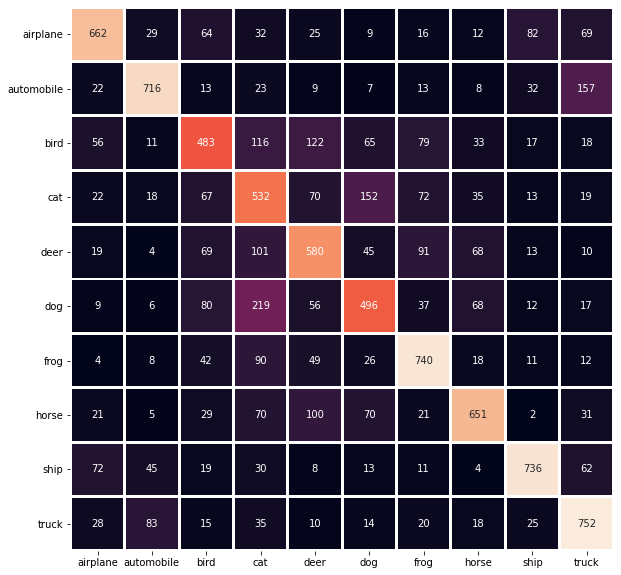

In [ ]:
import seaborn as sns
labels =  ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
cm=confusion_matrix(test_labels,p)
plt.figure(figsize=(10,10))
sns.heatmap(cm,square=True,cbar=False,xticklabels=labels,yticklabels=labels,annot=True,fmt="d",linewidths=2)

# Compare DNN vs CNN [CIFAR10]

In [ ]:
model_cnn = tf.keras.models.load_model('/content/drive/My Drive/Models/cifar_cnn.h5')
model_dnn = tf.keras.models.load_model('/content/drive/My Drive/Models/cifar_dnn.h5')

In [ ]:
logs_cnn = pd.read_csv('/content/drive/My Drive/Logs/cifar_cnn.csv')
logs_dnn = pd.read_csv('/content/drive/My Drive/Logs/cifar_dnn.csv')


## Compare Training

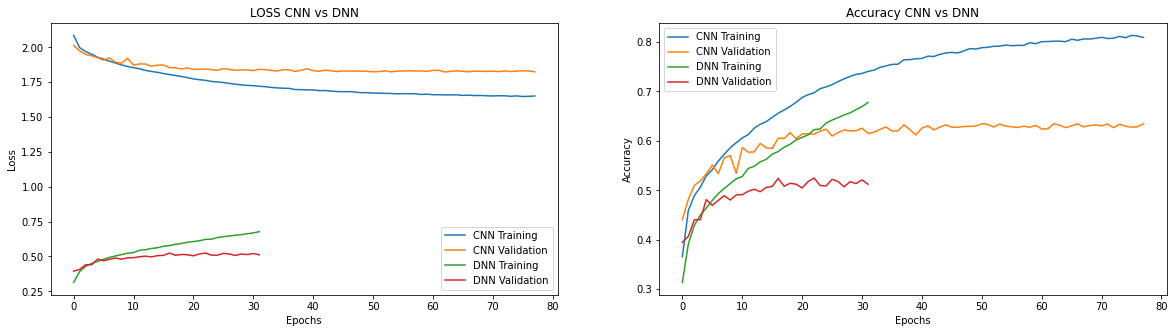

In [ ]:

fig, axs = plt.subplots(1, 2,figsize=(20,5))

axs[0].plot(logs_cnn['loss'],label='CNN Training')
axs[0].plot(logs_cnn['val_loss'],label='CNN Validation')
axs[0].plot(logs_dnn['accuracy'],label='DNN Training')
axs[0].plot(logs_dnn['val_accuracy'],label='DNN Validation')

axs[0].set_title('LOSS CNN vs DNN')
axs[0].set_xlabel("Epochs")
axs[0].set_ylabel("Loss")
axs[0].legend(loc="best")





axs[1].plot(logs_cnn['accuracy'],label='CNN Training')
axs[1].plot(logs_cnn['val_accuracy'],label='CNN Validation')
axs[1].plot(logs_dnn['accuracy'],label='DNN Training')
axs[1].plot(logs_dnn['val_accuracy'],label='DNN Validation')

axs[1].set_title('Accuracy CNN vs DNN')
axs[1].set_xlabel("Epochs")
axs[1].set_ylabel("Accuracy")
axs[1].legend(loc="best")






## Compare Evaluaion


### Accuracy & Loss

In [ ]:
loss_cnn, accuracy_cnn  = model_cnn.evaluate(test_images, test_labels,verbose=0)
loss_dnn, accuracy_dnn  = model_dnn.evaluate(test_images, test_labels,verbose=0)
print(f"Validation accuracy CNN :{round(accuracy_cnn*1000,4)} %")
print(f"Validation accuracy DNN :{round(accuracy_dnn*100,4)} %")
print(f"Validation Loss CNN:{loss_cnn}")
print(f"Validation Loss DNN :{loss_dnn}")

Validation accuracy CNN :91.5 %
Validation accuracy DNN :10.65 %
Validation Loss CNN:1.8235313892364502
Validation Loss DNN :1.4040132761001587


In [ ]:
loss_cnn, accuracy_cnn  = model_cnn.evaluate(train_images, train_labels,verbose=0)
loss_dnn, accuracy_dnn  = model_dnn.evaluate(train_images, train_labels,verbose=0)
print(f"Training accuracy CNN :{round(accuracy_cnn*1000,4)} %")
print(f"Training accuracy DNN :{round(accuracy_dnn*100,4)} %")
print(f"Training Loss CNN:{loss_cnn}")
print(f"Training Loss DNN :{loss_dnn}")

Training accuracy CNN :95.26 %
Training accuracy DNN :10.596 %
Training Loss CNN:1.64875328540802
Training Loss DNN :0.9919702410697937


## Compare Classification Report

In [ ]:
import numpy as np
p_cnn=model_cnn.predict(test_images)
p_dnn=model_dnn.predict(test_images)
p_cnn = [np.argmax(x) for x in p_cnn]
p_dnn = [np.argmax(x) for x in p_dnn]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print("Cnn Classification report")
print(classification_report(test_labels,p_cnn))
print("Dnn Classification report")
print(classification_report(test_labels,p_dnn))

Cnn Classification report
              precision    recall  f1-score   support

           0       0.72      0.66      0.69      1000
           1       0.77      0.72      0.74      1000
           2       0.55      0.48      0.51      1000
           3       0.43      0.53      0.47      1000
           4       0.56      0.58      0.57      1000
           5       0.55      0.50      0.52      1000
           6       0.67      0.74      0.70      1000
           7       0.71      0.65      0.68      1000
           8       0.78      0.74      0.76      1000
           9       0.66      0.75      0.70      1000

    accuracy                           0.63     10000
   macro avg       0.64      0.63      0.64     10000
weighted avg       0.64      0.63      0.64     10000

Dnn Classification report
              precision    recall  f1-score   support

           0       0.57      0.60      0.58      1000
           1       0.64      0.65      0.65      1000
           2       0.41   

## Confusion Matrix

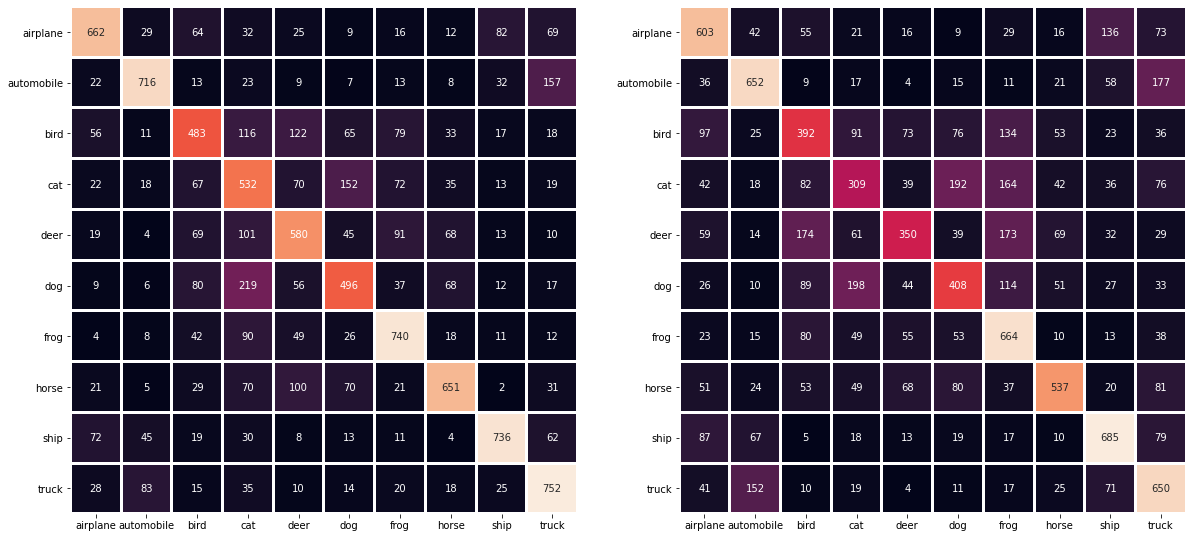

In [ ]:
import seaborn as sns
labels =  ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
cm_cnn=confusion_matrix(test_labels,p_cnn)
cm_dnn=confusion_matrix(test_labels,p_dnn)
fig, axs = plt.subplots(1, 2,figsize=(20,10))

sns.heatmap(cm_cnn,square=True,cbar=False,xticklabels=labels,yticklabels=labels,annot=True,fmt="d",linewidths=2,ax=axs[0])

sns.heatmap(cm_dnn,square=True,cbar=False,xticklabels=labels,yticklabels=labels,annot=True,fmt="d",linewidths=2,ax=axs[1])

# Demo Models

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.load_model('/content/drive/My Drive/Models/cifar_cnn.h5')

### Load image

In [ ]:
from google.colab import files

files.upload()

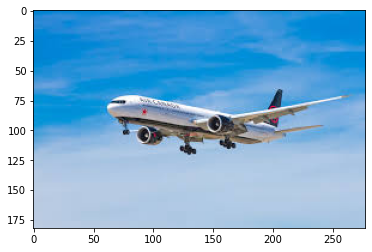

In [ ]:
import cv2
img = cv2.imread("/content/download.jpeg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [ ]:
img.shape

(182, 278, 3)

## Preprocess image

In [ ]:
inp_shape=(32,32,3)
img.resize(inp_shape)
img.shape

(32, 32, 3)

In [ ]:
img = img.reshape((1,32,32,3))
print(img.shape)

(1, 32, 32, 3)


### Predict

In [ ]:
labels=  ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
i=np.argmax(model.predict(img))
p=labels[i]
print("Predicted label: " + p)

Predicted label: airplane


# Load Random Input

In [ ]:
from google.colab import files

files.upload()

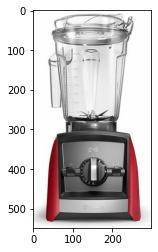

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("/content/68ce372b5725dd66c1af456ce4af0c71.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [ ]:
img.shape

(549, 299, 3)

## Preprocess image

In [ ]:
inp_shape=(32,32,3)
img.resize(inp_shape)
img.shape

(32, 32, 3)

In [ ]:
img = img.reshape((1,32,32,3))
print(img.shape)

(1, 32, 32, 3)


### Predict

In [ ]:
labels=  ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
i=np.argmax(model.predict(img))
p=labels[i]
print("Predicted label: " + p)

Predicted label: airplane


# Various specification

## Load Data

In [ ]:
import tensorflow as tf
cifar_data = tf.keras.datasets.cifar10
(train_images,train_labels),(test_images,test_labels) = cifar_data.load_data()

## Training and creating script

In [ ]:
def model_creation(optimizer , loss   , activation_h,activation_o,input_shape):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Conv2D(32, (3, 3), activation=activation_h, input_shape=input_shape))
  model.add(tf.keras.layers.MaxPooling2D((2, 2)))
  model.add(tf.keras.layers.Conv2D(32, (3, 3), activation=activation_h))
  model.add(tf.keras.layers.MaxPooling2D((2, 2)))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(256, activation=activation_h))
  model.add(tf.keras.layers.Dense(10,activation=activation_o))
  model.compile(optimizer=optimizer,loss=loss,metrics=['accuracy'])
  #model.summary()
  print(f"Optimizer :{optimizer} Loss: {loss} input shape : {input_shape} ")
  return model
      
def training(model ,train_images,train_labels,test_images,test_labels,name,epochs=100 ):
  checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath=f"{path_to_model}/{name}.h5", monitor = 'val_accuracy',verbose=1,save_best_only=True)
  es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=15)
  logs = tf.keras.callbacks.CSVLogger(filename=f"{path_to_logs}/{name}.csv")
  model.fit(train_images, train_labels, epochs=epochs, 
                    validation_data=(test_images, test_labels),callbacks=[checkpointer,es,logs])
  return model

  


## Diff parameterts

In [ ]:
optimizers = ['adam','sgd','adamax','rmsprop']
loss = 'sparse_categorical_crossentropy'
activation_h = ['relu','sigmoid']
activation_o = 'softmax'
in_shape = (32,32,3)

## Training

In [ ]:
h = []
for o in optimizers:
  for a in activation_h:
    m=model_creation(o,loss,a,activation_o,in_shape)
    model_name = f'cifar_cnn_{o}_{a}'
    m = training(m,train_images,train_labels,test_images,test_labels,model_name)

## Evaluation Comparizon

In [ ]:
import glob
import tensorflow as tf

## Load All models and logs

In [ ]:
models =  [ tf.keras.models.load_model(x) for x in glob.glob('/content/drive/My Drive/Models/*.h5')]
logs =  [ pd.read_csv(x) for x in glob.glob('/content/drive/My Drive/Logs/*.csv')]
names = [x.split('/')[-1].split(".")[0] for x in glob.glob('/content/drive/My Drive/Logs/*.csv')]

## Training process

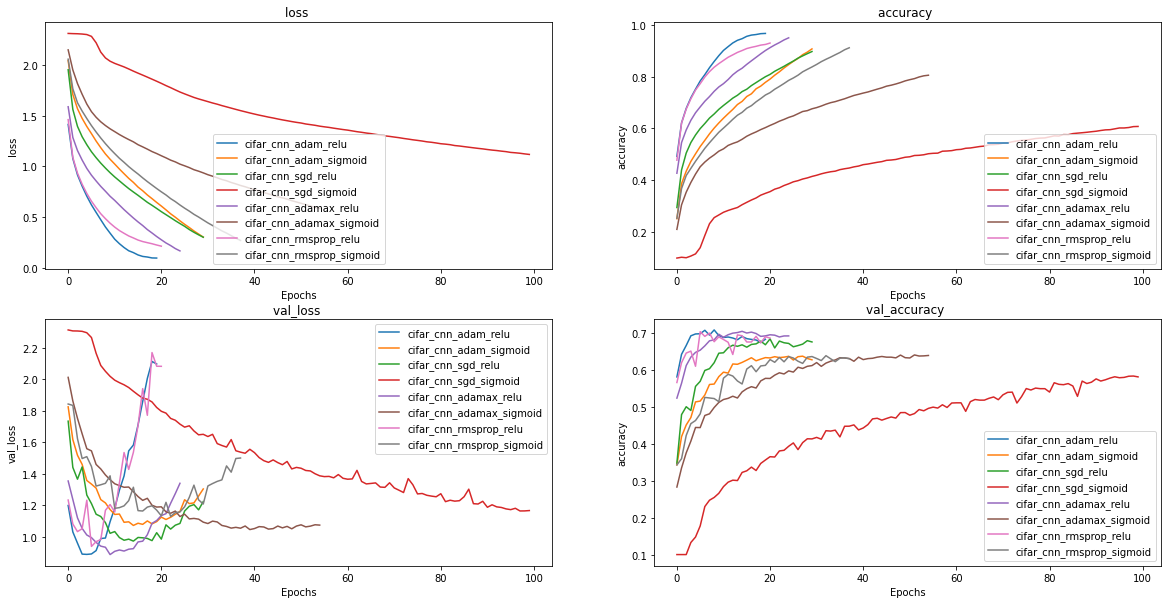

In [ ]:

fig, axs = plt.subplots(2,2,figsize=(20,10))

atr = 'loss'

axs[0,0].plot(logs[3][atr],label=f'{names[3]}')
axs[0,0].plot(logs[4][atr],label=f'{names[4]}')
axs[0,0].plot(logs[5][atr],label=f'{names[5]}')
axs[0,0].plot(logs[6][atr],label=f'{names[6]}')
axs[0,0].plot(logs[7][atr],label=f'{names[7]}')
axs[0,0].plot(logs[8][atr],label=f'{names[8]}')
axs[0,0].plot(logs[9][atr],label=f'{names[9]}')
axs[0,0].plot(logs[10][atr],label=f'{names[10]}')
axs[0,0].set_title(f'{atr} ')
axs[0,0].set_xlabel("Epochs")
axs[0,0].set_ylabel(f"{atr}")
axs[0,0].legend(loc="best")

atr2='accuracy'

axs[0,1].plot(logs[3][atr2],label=f'{names[3]}')
axs[0,1].plot(logs[4][atr2],label=f'{names[4]}')
axs[0,1].plot(logs[5][atr2],label=f'{names[5]}')
axs[0,1].plot(logs[6][atr2],label=f'{names[6]}')
axs[0,1].plot(logs[7][atr2],label=f'{names[7]}')
axs[0,1].plot(logs[8][atr2],label=f'{names[8]}')
axs[0,1].plot(logs[9][atr2],label=f'{names[9]}')
axs[0,1].plot(logs[10][atr2],label=f'{names[10]}')
axs[0,1].set_title(f'{atr2} ')
axs[0,1].set_xlabel("Epochs")
axs[0,1].set_ylabel(f"{atr2}")
axs[0,1].legend(loc="best")

atr3 = 'val_loss'

axs[1,0].plot(logs[3][atr3],label=f'{names[3]}')
axs[1,0].plot(logs[4][atr3],label=f'{names[4]}')
axs[1,0].plot(logs[5][atr3],label=f'{names[5]}')
axs[1,0].plot(logs[6][atr3],label=f'{names[6]}')
axs[1,0].plot(logs[7][atr3],label=f'{names[7]}')
axs[1,0].plot(logs[8][atr3],label=f'{names[8]}')
axs[1,0].plot(logs[9][atr3],label=f'{names[9]}')
axs[1,0].plot(logs[10][atr3],label=f'{names[10]}')
axs[1,0].set_title(f'{atr3} ')
axs[1,0].set_xlabel("Epochs")
axs[1,0].set_ylabel(f"{atr3}")
axs[1,0].legend(loc="best")

atr4='val_accuracy'

axs[1,1].plot(logs[3][atr4],label=f'{names[3]}')
axs[1,1].plot(logs[4][atr4],label=f'{names[4]}')
axs[1,1].plot(logs[5][atr4],label=f'{names[5]}')
axs[1,1].plot(logs[6][atr4],label=f'{names[6]}')
axs[1,1].plot(logs[7][atr4],label=f'{names[7]}')
axs[1,1].plot(logs[8][atr4],label=f'{names[8]}')
axs[1,1].plot(logs[9][atr4],label=f'{names[9]}')
axs[1,1].plot(logs[10][atr4],label=f'{names[10]}')
axs[1,1].set_title(f'{atr4} ')
axs[1,1].set_xlabel("Epochs")
axs[1,1].set_ylabel(f"{atr2}")
axs[1,1].legend(loc="best")


# Stream lit Web App

## Install py depedencies

In [ ]:
!pip install pyngrok

In [ ]:
!pip install streamlit

## App.py

In [ ]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
from PIL import Image , ImageOps
import cv2 
import numpy as np

labels =  ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
  
st.set_option('deprecation.showfileUploaderEncoding',False)
@st.cache(allow_output_mutation=True)
def lm():
  
  model = tf.keras.models.load_model('/content/drive/My Drive/Models/cifar_cnn.h5')
  return model

model = lm()

st.write("""
  # Cifar 10 Clasifier
""")
file = st.file_uploader("Upload an Image",type=['jpeg','jpg','png'])

def import_and_predict(image_data,model):


  size=(32,32)
  img = ImageOps.fit(image_data,size,Image.ANTIALIAS)
  img = np.asarray(img)
  img = img[np.newaxis,...]
  l = np.argmax(model.predict(img))
  i  = labels[l]
  return i

if file is None:
  st.text("Pls upload image")
else:
  image = Image.open(file)
  st.image(image,use_column_width=True)
  p = import_and_predict(image , model)
  st.success(str(p))



Writing app.py


## Download Hosting Dependencies

In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

--2020-09-01 05:17:17--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 34.231.196.161, 3.216.208.53, 34.206.18.248, ...
Connecting to bin.equinox.io (bin.equinox.io)|34.231.196.161|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.13M  13.3MB/s    in 1.0s    

2020-09-01 05:17:18 (13.3 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13773305/13773305]



In [ ]:
!unzip /content/ngrok-stable-linux-amd64.zip

Archive:  /content/ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [ ]:
!./ngrok authtoken 1gXagyREVZG8UEArEmla3g8urHp_7r2v3jmN7PjoHhvwmCT2P

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


## Run App.py

In [ ]:
!nohup streamlit run app.py &

nohup: appending output to 'nohup.out'


In [ ]:
from pyngrok import ngrok
url = ngrok.connect(port=8501)
url

'http://66cf711f0223.ngrok.io'